# **Avengers Face Recognition and Recommendation System**

In [1]:
from google.colab import files
import os
import shutil

In [2]:
files.upload()
os.makedirs('/root/.kaggle', exist_ok = True)
shutil.move('kaggle (1).json', '/root/.kaggle/kaggle.json')
os.chmod('/root/.kaggle/kaggle.json',600)

Saving kaggle (1).json to kaggle (1).json


In [3]:
!kaggle datasets download -d rawatjitesh/avengers-face-recognition

Dataset URL: https://www.kaggle.com/datasets/rawatjitesh/avengers-face-recognition
License(s): copyright-authors
  0% 0.00/54.5M [00:00<?, ?B/s]
100% 54.5M/54.5M [00:00<00:00, 1.43GB/s]


In [4]:
!unzip avengers-face-recognition.zip -d avengers_face_recognition

Archive:  avengers-face-recognition.zip
  inflating: avengers_face_recognition/cropped_images/chris_evans/chris_evans1.png  
  inflating: avengers_face_recognition/cropped_images/chris_evans/chris_evans10.png  
  inflating: avengers_face_recognition/cropped_images/chris_evans/chris_evans11.png  
  inflating: avengers_face_recognition/cropped_images/chris_evans/chris_evans12.png  
  inflating: avengers_face_recognition/cropped_images/chris_evans/chris_evans13.png  
  inflating: avengers_face_recognition/cropped_images/chris_evans/chris_evans14.png  
  inflating: avengers_face_recognition/cropped_images/chris_evans/chris_evans15.png  
  inflating: avengers_face_recognition/cropped_images/chris_evans/chris_evans16.png  
  inflating: avengers_face_recognition/cropped_images/chris_evans/chris_evans17.png  
  inflating: avengers_face_recognition/cropped_images/chris_evans/chris_evans18.png  
  inflating: avengers_face_recognition/cropped_images/chris_evans/chris_evans19.png  
  inflating: av

In [6]:
import cv2
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import xml.etree.ElementTree as xet
from sklearn.model_selection import train_test_split
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

Detected Classes: ['chris_evans', 'chris_hemsworth', 'mark_ruffalo', 'robert_downey_jr', 'scarlett_johansson']
✅ Data Loaded: (274, 128, 128, 3) (274,)
Train shape: (219, 128, 128, 3) (219, 5)
Test shape: (55, 128, 128, 3) (55, 5)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,285 (12.61 MB)

 Trainable params: 3,305,285 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.2216 - loss: 1.6758 - val_accuracy: 0.2545 - val_loss: 1.6037
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 998ms/step - accuracy: 0.2458 - loss: 1.5979 - val_accuracy: 0.2364 - val_loss: 1.6174
Epoch 3/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.2449 - loss: 1.5926 - val_accuracy: 0.3818 - val_loss: 1.5613
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.4248 - loss: 1.4976 - val_accuracy: 0.4182 - val_loss: 1.4421
Epoch 5/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.4880 - loss: 1.3344 - val_accuracy: 0.5273 - val_loss: 1.2935
Epoch 6/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5409 - loss: 1.1757 - val_accuracy: 0.5455 - val_loss: 1.2570
Epoch 7/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 984ms/step - accuracy: 0.6029 - loss: 1.0541 - val_accuracy: 0.6545 - val_loss: 1.0184
Epoch 8/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6511 - loss: 0.9465 - val_accuracy: 0.5455 - val_loss: 1.0511
Epoch 9/

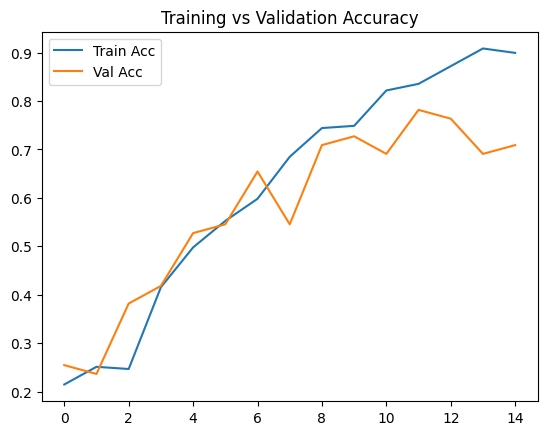

In [7]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# -------------------------------------------------------
# 1️⃣ Load dataset manually
# -------------------------------------------------------

data_dir = "avengers_face_recognition/cropped_images"
img_size = (128, 128)

X = []
y = []
class_names = os.listdir(data_dir)
class_names.sort()  # sort alphabetically for consistency

print("Detected Classes:", class_names)

# Load all images and labels
for label, class_name in enumerate(class_names):
    folder_path = os.path.join(data_dir, class_name)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = load_img(img_path, target_size=img_size)
        img_array = img_to_array(img)
        X.append(img_array)
        y.append(label)

X = np.array(X, dtype="float32") / 255.0  # normalize
y = np.array(y)

print("✅ Data Loaded:", X.shape, y.shape)

# -------------------------------------------------------
# 2️⃣ Split into train/test sets
# -------------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

# -------------------------------------------------------
# 3️⃣ Build CNN model
# -------------------------------------------------------

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# -------------------------------------------------------
# 4️⃣ Train the model
# -------------------------------------------------------

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=15,
    batch_size=32
)

# -------------------------------------------------------
# 5️⃣ Evaluate and visualize
# -------------------------------------------------------

loss, acc = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {acc*100:.2f}%")

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

# -------------------------------------------------------
# 6️⃣ Predict on a single image
# -------------------------------------------------------

img_path = "avengers_face_recognition/cropped_images/chris_evans/chris_evans1.png"
img = load_img(img_path, target_size=img_size)
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


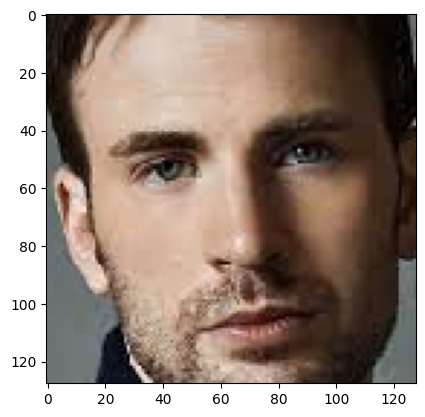

Predicted Avenger: chris_evans


In [11]:
import matplotlib.pyplot as plt
plt.imshow(img_array[0]) # Display the single image before prediction
pred = model.predict(img_array)
predicted_class = np.argmax(pred)
plt.show() # Show the displayed image
print("Predicted Avenger:", class_names[predicted_class])